In [1]:
# Install dependencies
!pip install --quiet nltk wordcloud matplotlib seaborn pandas

In [5]:
!curl -L -o twitter-airline-sentiment.zip\
  https://www.kaggle.com/api/v1/datasets/download/crowdflower/twitter-airline-sentiment

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2615k  100 2615k    0     0  5962k      0 --:--:-- --:--:-- --:--:--  189M


In [6]:
!unzip -q twitter-airline-sentiment.zip

In [7]:
import pandas as pd

# Load the dataset (ensure Tweets.csv is available in the working directory)
df = pd.read_csv("Tweets.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


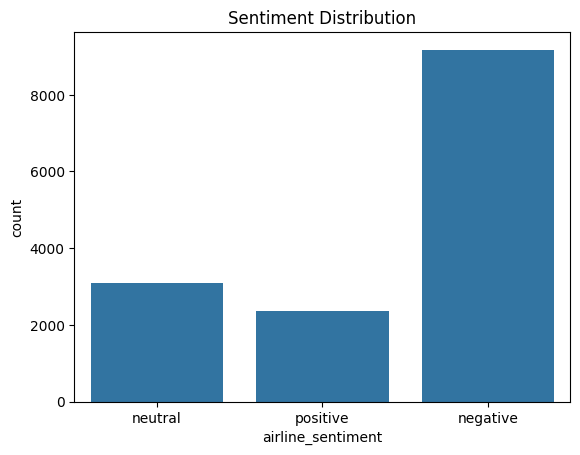

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="airline_sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()

In [13]:
import re, string, nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [33]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punk

True

In [34]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [35]:
def preprocess(text):
    # lowercase
    text = text.lower()
    # remove urls
    text = re.sub(r"http\S+|www\S+", "", text)
    # remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # tokenize
    tokens = word_tokenize(text)
    # remove stopwords and non-alpha
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    # lemmatize
    lemmas = [lemmatizer.lemmatize(w) for w in tokens]
    return lemmas

In [36]:
df['processed'] = df['text'].apply(preprocess)
df[['text','processed']].head()

,text,processed
0,@VirginAmerica What @dhepburn said.,"[virginamerica, dhepburn, said]"
1,@VirginAmerica plus you've added commercials t...,"[virginamerica, plus, youve, added, commercial..."
2,@VirginAmerica I didn't today... Must mean I n...,"[virginamerica, didnt, today, must, mean, need..."
3,@VirginAmerica it's really aggressive to blast...,"[virginamerica, really, aggressive, blast, obn..."
4,@VirginAmerica and it's a really big bad thing...,"[virginamerica, really, big, bad, thing]"


In [37]:
import nltk
sentence = df.text.iloc[1]
tokens = word_tokenize(sentence)
pos_tags = nltk.pos_tag(tokens)
ner_tree = nltk.ne_chunk(pos_tags)

In [38]:
entities = []
for subtree in ner_tree:
    if hasattr(subtree, 'label'):
        entity_name = " ".join([t for t, pos in subtree.leaves()])
        entities.append((entity_name, subtree.label()))

In [39]:
print("Sentence:", sentence)
print("POS tags:", pos_tags)
print("Named Entities:", entities)

Sentence: @VirginAmerica plus you've added commercials to the experience... tacky.
POS tags: [('@', 'NN'), ('VirginAmerica', 'NNP'), ('plus', 'CC'), ('you', 'PRP'), ("'ve", 'VBP'), ('added', 'VBN'), ('commercials', 'NNS'), ('to', 'TO'), ('the', 'DT'), ('experience', 'NN'), ('...', ':'), ('tacky', 'NN'), ('.', '.')]
Named Entities: [('VirginAmerica', 'ORGANIZATION')]


In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [41]:
df['processed'] = df['text'].apply(preprocess)

In [42]:
# WordCloud for positive and negative tweets
pos_words = " ".join([" ".join(words) for words in df[df.airline_sentiment=='positive'].processed])
neg_words = " ".join([" ".join(words) for words in df[df.airline_sentiment=='negative'].processed])

In [43]:
wc_pos = WordCloud(width=600, height=300).generate(pos_words)
wc_neg = WordCloud(width=600, height=300).generate(neg_words)


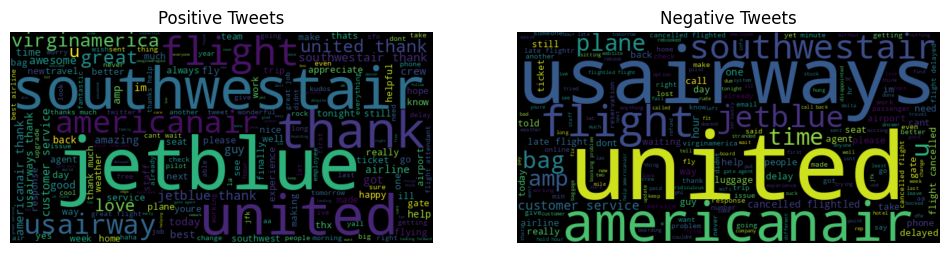

In [44]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Tweets")

plt.subplot(1,2,2)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Tweets")
plt.show()